In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [74]:
df = pd.read_csv('../../data/data_p1.csv')
df.head()

,W_rating,B_rating,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,W_utility,B_utility,W_visits,B_visits,W_winrate,B_winrate
0,1k,1k,pp cp dq cn qf pg qe og qj lq pq qo qn qm or o...,pd dd eq ep hq pf of qd nd nq qq qp ro rn pr q...,0.259317905 0.275272131 0.34262374 0.42036429 ...,0.269090086 0.368879974 0.313294873 0.32417401...,0.612279892 0.74496536 0.798256159 0.889255106...,0.659113407 1.01974392 0.845264435 0.903297544...,19.0972146 19.1262786 19.1251674 19.1245994 18...,18.9657594 18.7349877 19.0095144 19.3369429 19...,0.12718147 0.120274714 0.122864292 0.129893627...,0.123399746 0.14826827 0.121511509 0.136832864...,1 2 2 1 3 4 3 5 2 2 2 2 4 3 7 1 1 2 2 2 3 3 4 ...,1 1 3 1 7 3 4 2 2 1 2 3 1 2 2 4 4 1 1 1 2 1 1 ...,0.562697232 0.557953551 0.559613369 0.56364989...,0.56073527 0.57263428 0.559731811 0.567105129 ...
1,6d,6d,pd cd nc jq mq kq qo po rp pp pm lp ko jo lq p...,dp pq qf qk gq kp np qp nq rq qq mr lo kn mp l...,-0.336228907 -0.451985866 -0.450503439 -0.7391...,-0.195299417 -0.0215474814 -0.0487820767 -0.03...,-0.605065703 -0.531611502 -0.457107723 -1.0450...,-0.401197761 0.0677562729 -0.15006648 -0.24798...,18.9644117 19.1280327 19.729129 19.3076018 19....,18.9167735 18.8883766 19.0279104 19.1554812 19...,-0.0471866409 -0.0671499075 -0.0543352539 -0.1...,-0.0399894918 -0.0295713926 -0.0288667247 -0.0...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.47729221 0.467200309 0.473490342 0.449558154...,0.480593026 0.485114977 0.485785961 0.48624852...
2,6d,5d,pp dd qn nc qc qd qf pe qe rb rg rh md jc lc l...,pd cp nq jp qg pc qb pf oe of pb qh qi nd mc m...,-0.349154681 -0.376801372 -0.545067012 -0.8020...,-0.195299417 -0.0768974274 -0.11955905 -0.1752...,-0.541930556 -0.330013216 -0.606374502 -1.2199...,-0.401197761 0.0198039729 -0.197169349 -0.3251...,19.0330246 18.9204502 19.5971657 19.1583321 18...,18.9167735 18.6827555 18.9741695 18.9199851 19...,-0.0336682422 -0.0446066684 -0.0638532158 -0.1...,-0.0399894918 -0.0226193653 -0.0429800753 -0.0...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.483957827 0.47818011 0.468948692 0.443750501...,0.480593026 0.488661155 0.478798464 0.47418041...
3,7d,7d,pp cd ec dc cf bg qj oj pn pq qf pe oe pg qg p...,dp pd ed fc gd de nc qh nq qq pr pf qe qd of o...,-0.336228907 -0.295238197 -0.229173675 -0.0760...,-0.195299417 -0.0768974274 -0.0601286627 0.003...,-0.605065703 -0.410426706 -0.209649369 0.03247...,-0.401197761 0.0198039729 -0.110884048 0.04094...,18.9644117 18.9180193 19.2165282 19.1652372 19...,18.9167735 18.6827555 19.1083634 18.7139832 18...,-0.0471866409 -0.054626404 -0.0244442548 -0.01...,-0.0399894918 -0.0226193653 -0.0373227446 -0.0...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.47729221 0.473288074 0.48808302 0.493955001 ...,0.480593026 0.488661155 0.481500402 0.49729426...
4,1k,1k,dd pc ch fc cc eh gh hi dk cl cm cn ej dl fj f...,pp cp cf ef bd cj gf hh hg ck bl bm dj ek ei d...,0.177181661 0.0912810862 -0.0124292076 0.18370...,0.269090086 0.368569434 0.405650288 0.45500689...,0.525753796 0.459862649 0.369735599 0.51852411...,0.659113407 0.956286132 0.955671072 0.95877420...,19.1001073 19.0063469 19.5573579 19.5104465 19...,18.9657594 18.8312248 19.2703565 19.4730415 19...,0.132873656 0.0905799739 0.0834929752 0.094174...,0.123399746 0.12817058 0.143914374 0.143627353...,1 1 1 1 5 2 4 1 5 2 5 3 3 2 3 4 4 7 1 3 3 3 4 ...,1 1 1 1 3 3 6 4 3 4 2 5 4 3 9 11 3 3 3 3 2 2 4...,0.565669641 0.544617578 0.54121232 0.546337187...,0.56073527 0.56268169 0.570567831 0.570425987 ...


### Метрики по йосе

In [27]:
def is_marginal_move(move):
    return (move[0] == 'a' or move[0] == 'b') or (move[0] == 'r' or move[0] == 's') or\
            (move[1] == 'a' or move[1] == 'b') or (move[1] == 'r' or move[1] == 's')

def count_of_marginal_moves(moves):
    ans = np.zeros(len(moves))
    for i in range(len(moves)):
        ans[i] = is_marginal_move(moves[i])
    ans = np.cumsum(ans)
    return ans

In [15]:
moves = df[:1]
moves = moves['W_move']
moves1 = moves[0].split()
moves1

['pp',
 'cp',
 'dq',
 'cn',
 'qf',
 'pg',
 'qe',
 'og',
 'qj',
 'lq',
 'pq',
 'qo',
 'qn',
 'qm',
 'or',
 'oq',
 'kp',
 'mp',
 'kq',
 'np',
 'fc',
 'fd',
 'jc',
 'ck',
 'gb',
 'je',
 'co',
 'hc',
 'gc',
 'ch',
 'dj',
 'di',
 'bk',
 'eh',
 'ek',
 'ib',
 'ei',
 'ip',
 'ho',
 'iq',
 'hr',
 'gq',
 'go',
 'fo',
 'hn',
 'en',
 'lb',
 'kb',
 'nj',
 'pk',
 'rl',
 'rk',
 'hj',
 're',
 'sd',
 'se',
 'dr',
 'gi',
 'li',
 'mi',
 'nh',
 'le',
 'ok',
 'jr',
 'kj',
 'kk',
 'jj',
 'ii',
 'hi',
 'il',
 'hl',
 'gl',
 'fk',
 'im',
 'fl',
 'lg',
 'kh',
 'md',
 'mf',
 'mh',
 'ld',
 'mc',
 'gf',
 'hf',
 'sm',
 'sk',
 'ps',
 'sp',
 'qs',
 'os',
 'ge',
 'kf',
 'mf',
 'ni',
 'oi',
 'ai']

In [28]:
marginal_moves = count_of_marginal_moves(moves1)

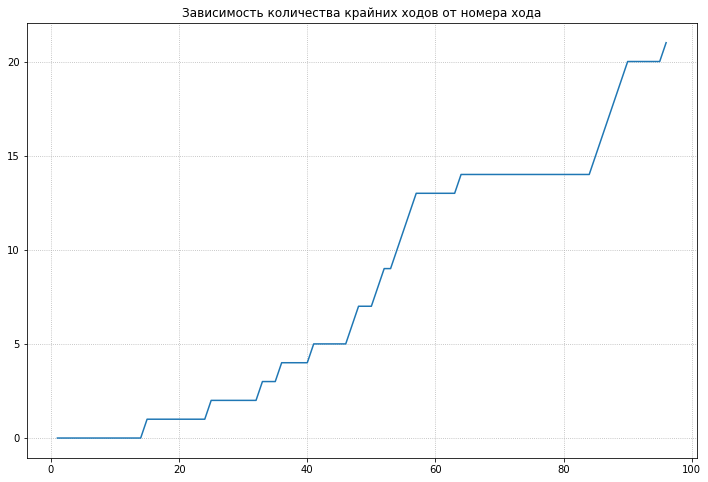

In [30]:
plt.figure(figsize=(12, 8))
plt.title('Зависимость количества крайних ходов от номера хода')
plt.plot(np.arange(1, 1 + len(marginal_moves)), marginal_moves)
plt.grid(ls=":")
plt.show()

In [53]:
def print_marg_moves_for_ratings(ratings, df):
    plt.figure(figsize=(12, 8))
    plt.title('Зависимость количества крайних ходов от номера хода')


    for rating in ratings:
        df_rat = df.loc[df['W_rating'] == rating]
        #print(df_rat)
        moves = []
        max_len = 0
        for i, row in df_rat.iterrows():
            #print(row['W_move'])
            moves.append(count_of_marginal_moves(row['W_move'].split()).tolist())
            max_len = max(max_len, len(moves[-1]))
        for i in range(len(moves)):
            count = max_len - len(moves[i])
            moves[i].extend(count*[moves[i][-1]])

        moves = np.array(moves).mean(axis=0)
        plt.plot(np.arange(1, 1 + len(moves)), moves, label=rating)
    plt.legend()
    plt.grid(ls=":")
    plt.show()

In [55]:
df.value_counts('W_rating')

W_rating
7d    1048
1d    1000
1k    1000
2d    1000
2k    1000
3d    1000
3k    1000
4d    1000
5d    1000
6d     505
dtype: int64

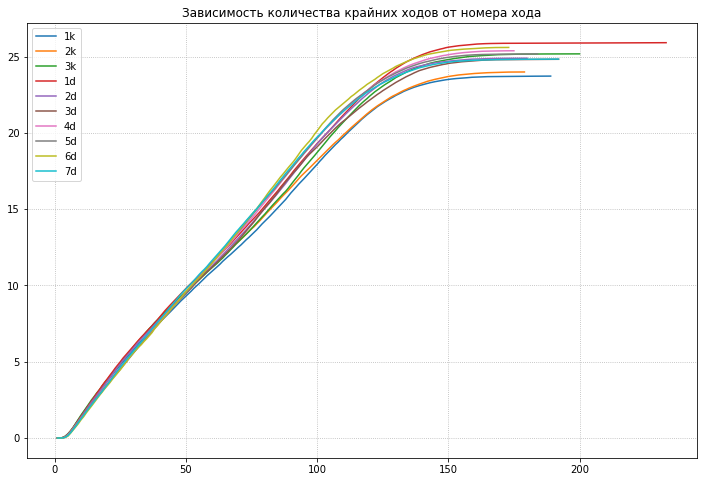

In [56]:
ratings = ['1k', '2k', '3k', '1d', '2d', '3d', '4d', '5d', '6d', '7d']
print_marg_moves_for_ratings(ratings, df)

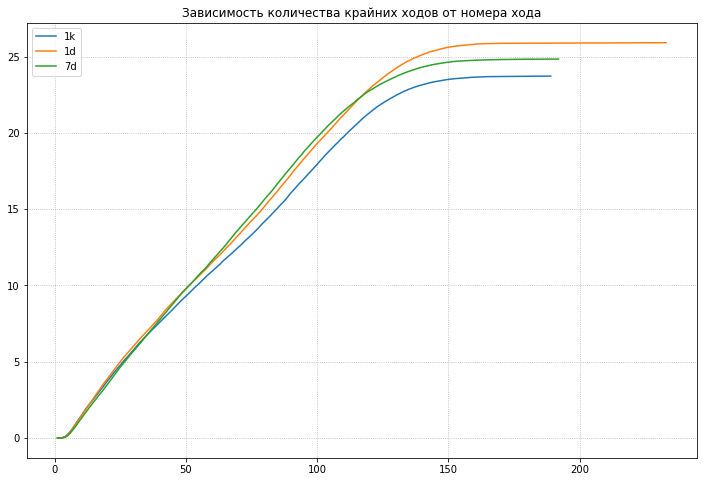

In [58]:
ratings = ['1k', '1d', '7d']
print_marg_moves_for_ratings(ratings, df)

**Вывод:**
* Средняя динамика количества крайних ходов особо не отличается от дана
* Имеет смысл для каждой отдельной партии определять йосе и уже после этого считать метрики по йосе, так как после усреднения по рейтингу получаем одинакову картину по всем данам

In [62]:
def print_marg_moves_for_games(df):
    plt.figure(figsize=(12, 8))
    plt.title('Зависимость количества крайних ходов от номера хода')


    moves = []
    max_len = 0
    for i, row in df.iterrows():
        moves = count_of_marginal_moves(row['W_move'].split())
        plt.plot(np.arange(1, 1 + len(moves)), moves, label=row['W_rating'])

    plt.legend()
    plt.grid(ls=":")
    plt.show()

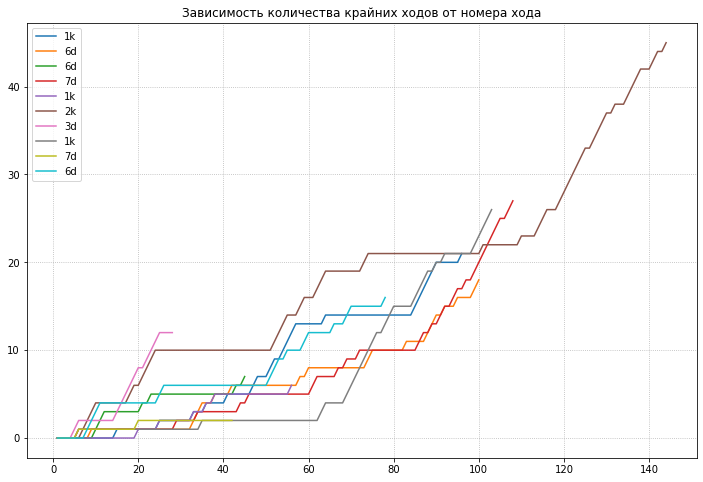

In [63]:
print_marg_moves_for_games(df[:10])

In [67]:
s_df = df[:10].copy()
s_df['Hata'] = None
for i, row in s_df.iterrows():
    row['Hata'] = i
s_df

,W_rating,B_rating,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,W_utility,B_utility,W_visits,B_visits,W_winrate,B_winrate,Hata
0,1k,1k,pp cp dq cn qf pg qe og qj lq pq qo qn qm or o...,pd dd eq ep hq pf of qd nd nq qq qp ro rn pr q...,0.259317905 0.275272131 0.34262374 0.42036429 ...,0.269090086 0.368879974 0.313294873 0.32417401...,0.612279892 0.74496536 0.798256159 0.889255106...,0.659113407 1.01974392 0.845264435 0.903297544...,19.0972146 19.1262786 19.1251674 19.1245994 18...,18.9657594 18.7349877 19.0095144 19.3369429 19...,0.12718147 0.120274714 0.122864292 0.129893627...,0.123399746 0.14826827 0.121511509 0.136832864...,1 2 2 1 3 4 3 5 2 2 2 2 4 3 7 1 1 2 2 2 3 3 4 ...,1 1 3 1 7 3 4 2 2 1 2 3 1 2 2 4 4 1 1 1 2 1 1 ...,0.562697232 0.557953551 0.559613369 0.56364989...,0.56073527 0.57263428 0.559731811 0.567105129 ...,0
1,6d,6d,pd cd nc jq mq kq qo po rp pp pm lp ko jo lq p...,dp pq qf qk gq kp np qp nq rq qq mr lo kn mp l...,-0.336228907 -0.451985866 -0.450503439 -0.7391...,-0.195299417 -0.0215474814 -0.0487820767 -0.03...,-0.605065703 -0.531611502 -0.457107723 -1.0450...,-0.401197761 0.0677562729 -0.15006648 -0.24798...,18.9644117 19.1280327 19.729129 19.3076018 19....,18.9167735 18.8883766 19.0279104 19.1554812 19...,-0.0471866409 -0.0671499075 -0.0543352539 -0.1...,-0.0399894918 -0.0295713926 -0.0288667247 -0.0...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.47729221 0.467200309 0.473490342 0.449558154...,0.480593026 0.485114977 0.485785961 0.48624852...,1
2,6d,5d,pp dd qn nc qc qd qf pe qe rb rg rh md jc lc l...,pd cp nq jp qg pc qb pf oe of pb qh qi nd mc m...,-0.349154681 -0.376801372 -0.545067012 -0.8020...,-0.195299417 -0.0768974274 -0.11955905 -0.1752...,-0.541930556 -0.330013216 -0.606374502 -1.2199...,-0.401197761 0.0198039729 -0.197169349 -0.3251...,19.0330246 18.9204502 19.5971657 19.1583321 18...,18.9167735 18.6827555 18.9741695 18.9199851 19...,-0.0336682422 -0.0446066684 -0.0638532158 -0.1...,-0.0399894918 -0.0226193653 -0.0429800753 -0.0...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.483957827 0.47818011 0.468948692 0.443750501...,0.480593026 0.488661155 0.478798464 0.47418041...,2
3,7d,7d,pp cd ec dc cf bg qj oj pn pq qf pe oe pg qg p...,dp pd ed fc gd de nc qh nq qq pr pf qe qd of o...,-0.336228907 -0.295238197 -0.229173675 -0.0760...,-0.195299417 -0.0768974274 -0.0601286627 0.003...,-0.605065703 -0.410426706 -0.209649369 0.03247...,-0.401197761 0.0198039729 -0.110884048 0.04094...,18.9644117 18.9180193 19.2165282 19.1652372 19...,18.9167735 18.6827555 19.1083634 18.7139832 18...,-0.0471866409 -0.054626404 -0.0244442548 -0.01...,-0.0399894918 -0.0226193653 -0.0373227446 -0.0...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.47729221 0.473288074 0.48808302 0.493955001 ...,0.480593026 0.488661155 0.481500402 0.49729426...,3
4,1k,1k,dd pc ch fc cc eh gh hi dk cl cm cn ej dl fj f...,pp cp cf ef bd cj gf hh hg ck bl bm dj ek ei d...,0.177181661 0.0912810862 -0.0124292076 0.18370...,0.269090086 0.368569434 0.405650288 0.45500689...,0.525753796 0.459862649 0.369735599 0.51852411...,0.659113407 0.956286132 0.955671072 0.95877420...,19.1001073 19.0063469 19.5573579 19.5104465 19...,18.9657594 18.8312248 19.2703565 19.4730415 19...,0.132873656 0.0905799739 0.0834929752 0.094174...,0.123399746 0.12817058 0.143914374 0.143627353...,1 1 1 1 5 2 4 1 5 2 5 3 3 2 3 4 4 7 1 3 3 3 4 ...,1 1 1 1 3 3 6 4 3 4 2 5 4 3 9 11 3 3 3 3 2 2 4...,0.565669641 0.544617578 0.54121232 0.546337187...,0.56073527 0.56268169 0.570567831 0.570425987 ...,4
5,2k,2k,od de ec pc pf qg rh qb pb gb oc qi cf cn ci d...,dp qp kq qc qd rf rg kc rb ra nc me cg dg ck b...,0.321608111 0.607462049 0.179032087 0.96871393...,0.269090086 0.870690286 1.18196797 0.93476065 ...,0.694481805 1.37148619 0.691041648 1.88331527 ...,0.659113407 1.

In [81]:
def get_stats_on_last_moves(row, n_moves, suff=None):
    sum_win = 0
    cnt_beautiful = 0
    cnt_beautifulS = 0
    winrate_delta = []
    
    moves_len = min(len(row['W_winrate']), len(row['B_winrate']))
    for i in range(moves_len - n_moves - 1, moves_len):
        if (i != 0):
            winrate_delta.append(row['W_winrate'][i] - row['B_winrate'][i - 1])
            cnt_beautiful += int((row['W_winrate'][i] - row['B_winrate'][i - 1]) > 0)
            cnt_beautifulS += int((row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) > 0)
    row['mean_deltawinrate '+suff] = np.mean(winrate_delta)  
    row['beautiful_percent '+suff] = cnt_beautiful / (len(row['W_winrate']) - 1) 
    row['beautifulS_percent '+suff] = cnt_beautifulS / (len(row['W_winrate']) - 1) 
    sum_scoreLead = 0
    score_S = []
    scoreSelfplay = []
    utility = []
    for i in range(moves_len - n_moves - 1, moves_len):
        if (i != 0):
            score_S.append(row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) 
            scoreSelfplay.append(row['W_scoreSelfplay'][i] - row['B_scoreSelfplay'][i - 1]) 
            utility.append(row['W_utility'][i] - row['B_utility'][i - 1]) 

    score_S.sort()
    winrate_delta.sort()

    row['mean_deltascoreLead '+suff] = np.mean(score_S)
    row['mean_deltaSelfPlay '+suff] = np.mean(scoreSelfplay)
    

    dispersy_scoreLead = 0
    for i in range(moves_len - n_moves - 1, moves_len):
        if (i != 0):
            dispersy_scoreLead += (row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]\
                                   - row['mean_deltascoreLead '+suff]) ** 2
    row['dispersy_scoreLead '+suff] = dispersy_scoreLead / (n_moves - 1) 
    row['mean_utility '+suff] = np.mean(utility)
    
def add_last_moves_stats(df, n_moves, suff=None):
    if suff is None:
        suff = str(n_moves)
    df['mean_deltawinrate '+suff] = None 
    df['beautiful_percent '+suff] = None
    df['beautifulS_percent '+suff] = None
    df['mean_deltascoreLead '+suff] = None
    df['mean_deltaSelfPlay '+suff] = None
    df['dispersy_scoreLead '+suff] = None
    df['mean_utility '+suff] = None
    for i, row in tqdm(df.iterrows()):
        get_stats_on_last_moves(row, n_moves, suff)


def precalc_df(data):
    data['mean_deltawinrate'] = None
    data['mean_deltaScore50p'] = None
    data['mean_deltascoreLead'] = None
    data['dispersy_scoreLead'] = None
    data['beautiful_percent'] = None
    data['beautifulS_percent'] = None
    data['mean_utility'] = None
    data['Score25p'] = None
    data['Score75p'] = None
    data['Winrate25p'] = None
    data['Winrate75p'] = None
    data['mean_deltawinrate50p'] = None
    data['median_scorelead'] = None
    data['length'] = None
    data['chiselka'] = None
    data['mean_deltaSelfPlay'] = None

    for i, row in tqdm(data.iterrows()):
        row['W_scoreLead'] = [float(x) for x in row['W_scoreLead'].split()]
        row['B_scoreLead'] = [float(x) for x in row['B_scoreLead'].split()]
        row['W_scoreSelfplay'] = [float(x) for x in row['W_scoreSelfplay'].split()]
        row['B_scoreSelfplay'] = [float(x) for x in row['B_scoreSelfplay'].split()]
        row['W_scoreStdev'] = [float(x) for x in row['W_scoreStdev'].split()]
        row['B_scoreStdev'] = [float(x) for x in row['B_scoreStdev'].split()]
        row['W_utility'] = [float(x) for x in row['W_utility'].split()]
        row['B_utility'] = [float(x) for x in row['B_utility'].split()]
        row['W_winrate'] = [float(x) for x in row['W_winrate'].split()]
        row['B_winrate'] = [float(x) for x in row['B_winrate'].split()]
        row['length'] = len(row['W_winrate']) + len(row['B_winrate'])
        if (row['W_rating'][1] == 'k'):
            row['chiselka'] = -int(row['W_rating'][0]) + 1
        else:
            row['chiselka'] = int(row['W_rating'][0])
            
        sum_win = 0
        cnt_beautiful = 0
        cnt_beautifulS = 0
        winrate_delta = []
        for i in range(min(len(row['W_winrate']), len(row['B_winrate']))):
            if (i != 0):
                winrate_delta.append(row['W_winrate'][i] - row['B_winrate'][i - 1])
                cnt_beautiful += int((row['W_winrate'][i] - row['B_winrate'][i - 1]) > 0)
                cnt_beautifulS += int((row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) > 0)
        row['mean_deltawinrate'] = np.mean(winrate_delta)  
        row['beautiful_percent'] = cnt_beautiful / (len(row['W_winrate']) - 1) 
        row['beautifulS_percent'] = cnt_beautifulS / (len(row['W_winrate']) - 1) 
        sum_scoreLead = 0
        score_S = []
        scoreSelfplay = []
        utility = []
        for i in range(min(len(row['W_scoreLead']), len(row['B_winrate']))):
            if (i != 0):
                score_S.append(row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) 
                scoreSelfplay.append(row['W_scoreSelfplay'][i] - row['B_scoreSelfplay'][i - 1]) 
                utility.append(row['W_utility'][i] - row['B_utility'][i - 1]) 

        score_S.sort()
        winrate_delta.sort()

        row['Score25p'] = score_S[int(len(score_S) * 0.25)]
        row['Score75p'] = score_S[int(len(score_S) * 0.75)]

        row['Winrate25p'] = winrate_delta[int(len(score_S) * 0.25)]
        row['Winrate75p'] = winrate_delta[int(len(score_S) * 0.75)]


        row['median_scorelead'] =  score_S[int(len(score_S) * 0.5)] 
        row['mean_deltascoreLead'] = np.mean(score_S)
        row['mean_deltaSelfPlay'] = np.mean(scoreSelfplay)
        if (row['length'] > 4):
            row['mean_deltaScore50p'] = np.mean(score_S[int(len(score_S) * 0.25):int(len(score_S) * 0.75)])
            row['mean_deltawinrate50p'] = np.mean(winrate_delta[int(len(score_S) * 0.25):int(len(score_S) * 0.75)])
        else:
            row['mean_deltawinrate50p'] = 0
            row['mean_deltaScore50p'] = 0;

        dispersy_scoreLead = 0
        for i in range(min(len(row['W_scoreLead']), len(row['B_winrate']))):
            if (i != 0):
                dispersy_scoreLead += (row['W_scoreLead'][i] - row['B_scoreLead'][i - 1] -\
                                       row['mean_deltascoreLead']) ** 2
        row['dispersy_scoreLead'] = dispersy_scoreLead / (len(row['W_scoreLead']) - 1) 
        row['mean_utility'] = np.mean(utility)

In [76]:
precalc_df(df)
df

9553it [01:21, 117.28it/s]


,W_rating,B_rating,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,...,mean_utility,Score25p,Score75p,Winrate25p,Winrate75p,mean_deltawinrate50p,median_scorelead,length,chiselka,mean_deltaSelfPlay
0,1k,1k,pp cp dq cn qf pg qe og qj lq pq qo qn qm or o...,pd dd eq ep hq pf of qd nd nq qq qp ro rn pr q...,"[0.259317905, 0.275272131, 0.34262374, 0.42036...","[0.269090086, 0.368879974, 0.313294873, 0.3241...","[0.612279892, 0.74496536, 0.798256159, 0.88925...","[0.659113407, 1.01974392, 0.845264435, 0.90329...","[19.0972146, 19.1262786, 19.1251674, 19.124599...","[18.9657594, 18.7349877, 19.0095144, 19.336942...",...,-0.005789,-1.315356,0.535419,-0.001493,0.003918,0.00013,-0.202724,193,0,-0.458476
1,6d,6d,pd cd nc jq mq kq qo po rp pp pm lp ko jo lq p...,dp pq qf qk gq kp np qp nq rq qq mr lo kn mp l...,"[-0.336228907, -0.451985866, -0.450503439, -0....","[-0.195299417, -0.0215474814, -0.0487820767, -...","[-0.605065703, -0.531611502, -0.457107723, -1....","[-0.401197761, 0.0677562729, -0.15006648, -0.2...","[18.9644117, 19.1280327, 19.729129, 19.3076018...","[18.9167735, 18.8883766, 19.0279104, 19.155481...",...,-0.104847,-2.959774,1.230954,-0.035192,0.0013,-0.007565,-0.690325,200,6,-2.358093
2,6d,5d,pp dd qn nc qc qd qf pe qe rb rg rh md jc lc l...,pd cp nq jp qg pc qb pf oe of pb qh qi nd mc m...,"[-0.349154681, -0.376801372, -0.545067012, -0....","[-0.195299417, -0.0768974274, -0.11955905, -0....","[-0.541930556, -0.330013216, -0.606374502, -1....","[-0.401197761, 0.0198039729, -0.197169349, -0....","[19.0330246, 18.9204502, 19.5971657, 19.158332...","[18.9167735, 18.6827555, 18.9741695, 18.919985...",...,-0.058709,-1.50621,-0.181502,-0.02293,-0.002413,-0.011525,-0.760914,90,6,-0.990979
3,7d,7d,pp cd ec dc cf bg qj oj pn pq qf pe oe pg qg p...,dp pd ed fc gd de nc qh nq qq pr pf qe qd of o...,"[-0.336228907, -0.295238197, -0.229173675, -0....","[-0.195299417, -0.0768974274, -0.0601286627, 0...","[-0.605065703, -0.410426706, -0.209649369, 0.0...","[-0.401197761, 0.0198039729, -0.110884048, 0.0...","[18.9644117, 18.9180193, 19.2165282, 19.165237...","[18.9167735, 18.6827555, 19.1083634, 18.713983...",...,-0.037931,-1.474927,0.942557,-0.090739,0.019415,-0.018728,-0.366192,217,7,-0.215411
4,1k,1k,dd pc ch fc cc eh gh hi dk cl cm cn ej dl fj f...,pp cp cf ef bd cj gf hh hg ck bl bm dj ek ei d...,"[0.177181661, 0.0912810862, -0.0124292076, 0.1...","[0.269090086, 0.368569434, 0.405650288, 0.4550...","[0.525753796, 0.459862649, 0.369735599, 0.5185...","[0.659113407, 0.956286132, 0.955671072, 0.9587...","[19.1001073, 19.0063469, 19.5573579, 19.510446...","[18.9657594, 18.8312248, 19.2703565, 19.473041...",...,-0.033198,-1.151494,0.814298,-0.046642,0.030533,-0.009909,-0.195103,113,0,-0.32107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9548,5d,5d,dd dp md pc ob pb qb qd rd ra sb gc cd ec fb f...,pd qp nq qf oc qc od nc rc rb nb kd cc dc eb e...,"[0.18786788, 0.0888703763, -0.0687427819, 0.13...","[0.225592554, 0.39786166, 0.302593857, 0.72879...","[0.440063834, 0.331433862, 0.196966603, 0.5109...","[0.595243096, 0.963890076, 0.780920267, 1.5035...","[18.9411434, 18.6885692, 19.2765611, 19.189947...","[18.9453784, 18.7263741, 19.0141612, 19.317579...",...,-0.075678,-2.410015,1.271379,-0.07422,0.002295,-0.016235,-0.862154,203,5,-0.649659
9549,4d,4d,dp dc ed cj cd ej ee pe md of nf pd qc rb rd p...,pc pp ce cn ch de bp eh ph oe ne me oc qb pb n...,"[0.175838917, 0.0344207883, 0.129063725, 0.131...","[0.225591511, 0.263788551, 0.416289717, 0.4561...","[0.404811949, 0.28579697, 0.472031385, 0.60521...","[0.595240831, 0.858567476, 0.950118184, 1.0261...","[19.0041517, 18.7846616, 18.9799256, 19.372818...","[18.9453785, 18.6755181, 19.3232301, 19.510719...",...,-0.130429,-6.346649,-0.191171,-0.089682,0.000526,-0.018756,-3.21548,173,4,-3.593646
9550,4d,4d,dq qp cm cr er gq hq cj fr ir jq hr oc lc od n...,dd qd do cq cp fp gp hp fq iq jr ip kq pe pc o...,"

In [83]:
add_last_moves_stats(df, 10, suff=None)
df.head()

9553it [00:10, 923.25it/s]


,W_rating,B_rating,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,...,mean_deltaSelfPlay 20,dispersy_scoreLead 20,mean_utility 20,mean_deltawinrate 10,beautiful_percent 10,beautifulS_percent 10,mean_deltascoreLead 10,mean_deltaSelfPlay 10,dispersy_scoreLead 10,mean_utility 10
0,1k,1k,pp cp dq cn qf pg qe og qj lq pq qo qn qm or o...,pd dd eq ep hq pf of qd nd nq qq qp ro rn pr q...,"[0.259317905, 0.275272131, 0.34262374, 0.42036...","[0.269090086, 0.368879974, 0.313294873, 0.3241...","[0.612279892, 0.74496536, 0.798256159, 0.88925...","[0.659113407, 1.01974392, 0.845264435, 0.90329...","[19.0972146, 19.1262786, 19.1251674, 19.124599...","[18.9657594, 18.7349877, 19.0095144, 19.336942...",...,-1.346865,5.015348,0.007447,0.000121,0.052632,0.031579,-1.297609,-1.294768,7.057896,0.010016
1,6d,6d,pd cd nc jq mq kq qo po rp pp pm lp ko jo lq p...,dp pq qf qk gq kp np qp nq rq qq mr lo kn mp l...,"[-0.336228907, -0.451985866, -0.450503439, -0....","[-0.195299417, -0.0215474814, -0.0487820767, -...","[-0.605065703, -0.531611502, -0.457107723, -1....","[-0.401197761, 0.0677562729, -0.15006648, -0.2...","[18.9644117, 19.1280327, 19.729129, 19.3076018...","[18.9167735, 18.8883766, 19.0279104, 19.155481...",...,-0.262442,36.674161,-0.005032,-0.000397,0.040404,0.080808,1.655611,2.575887,30.030378,0.002445
2,6d,5d,pp dd qn nc qc qd qf pe qe rb rg rh md jc lc l...,pd cp nq jp qg pc qb pf oe of pb qh qi nd mc m...,"[-0.349154681, -0.376801372, -0.545067012, -0....","[-0.195299417, -0.0768974274, -0.11955905, -0....","[-0.541930556, -0.330013216, -0.606374502, -1....","[-0.401197761, 0.0198039729, -0.197169349, -0....","[19.0330246, 18.9204502, 19.5971657, 19.158332...","[18.9167735, 18.6827555, 18.9741695, 18.919985...",...,-0.452145,3.043893,-0.012886,-0.003207,0.022727,0.090909,-1.167016,-0.525305,5.679307,-0.008551
3,7d,7d,pp cd ec dc cf bg qj oj pn pq qf pe oe pg qg p...,dp pd ed fc gd de nc qh nq qq pr pf qe qd of o...,"[-0.336228907, -0.295238197, -0.229173675, -0....","[-0.195299417, -0.0768974274, -0.0601286627, 0...","[-0.605065703, -0.410426706, -0.209649369, 0.0...","[-0.401197761, 0.0198039729, -0.110884048, 0.0...","[18.9644117, 18.9180193, 19.2165282, 19.165237...","[18.9167735, 18.6827555, 19.1083634, 18.713983...",...,0.665486,10.295085,0.057108,0.000222,0.065421,0.028037,-0.764123,-0.675312,2.751201,-0.001657
4,1k,1k,dd pc ch fc cc eh gh hi dk cl cm cn ej dl fj f...,pp cp cf ef bd cj gf hh hg ck bl bm dj ek ei d...,"[0.177181661, 0.0912810862, -0.0124292076, 0.1...","[0.269090086, 0.368569434, 0.405650288, 0.4550...","[0.525753796, 0.459862649, 0.369735599, 0.5185...","[0.659113407, 0.956286132, 0.955671072, 0.9587...","[19.1001073, 19.0063469, 19.5573579, 19.510446...","[18.9657594, 18.8312248, 19.2703565, 19.473041...",...,0.523159,4.350642,0.046017,0.006526,0.109091,0.127273,0.437542,0.355454,6.123699,0.012973
